<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part2/P2_Ch02_CH04_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression (N Feature)

(3, 100) (100,)


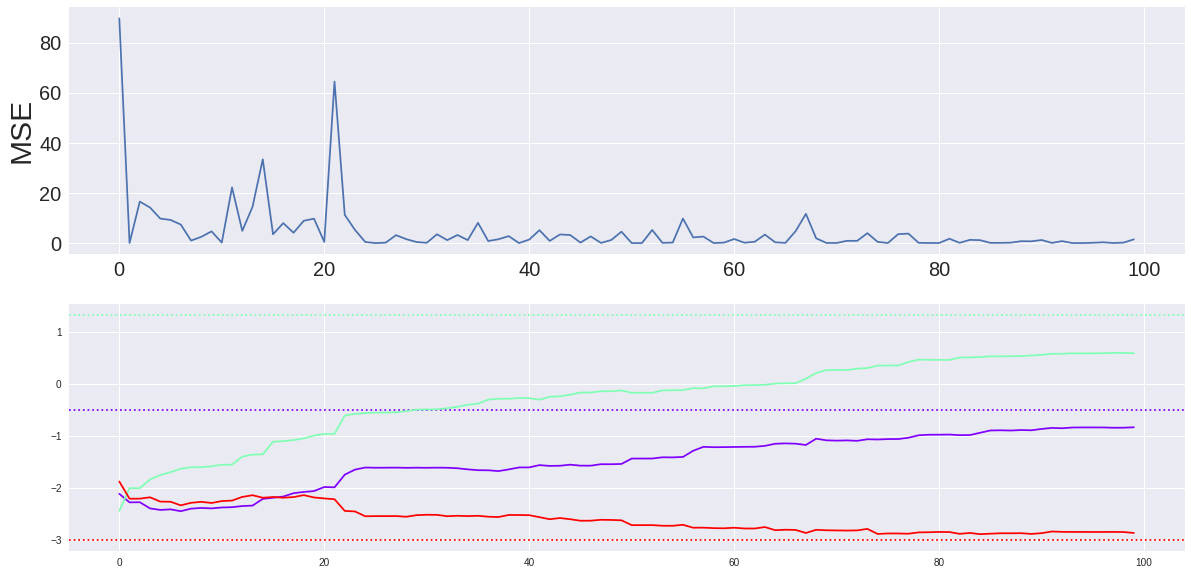

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')

#set params
N, n_feature = 100, 3
lr = 0.01
t_W = np.random.uniform(-3, 3, (n_feature, 1))
t_b = np.random.uniform(-3, 3 , (1, ))

W = np.random.uniform(-3, 3, (n_feature, 1))
b = np.random.uniform(-3, 3 , (1, 1))

#generate dataset
x_data = np.random.randn(N, n_feature)
# print(x_data.shape, t_W.shape, t_b.shape)
y_data = x_data @ t_W + t_b
# print(y_data.shape)

J_track = list()
W_track, b_track = list(), list()
for data_idx, (X, y ) in enumerate(zip(x_data, y_data)):
  W_track.append(W)
  b_track.append(b)

  #forward propagation 
  X = X.reshape(1, -1)
  # print(X.shape, W.shape, b.shape)
  # break
  pred = X @ W + b
  # print(pred)
  # break
  # print(y.shape, pred.shape)
  # break
  J = (y - pred)**2
  # print(J.squeeze().shape)
  # break
  J_track.append(J.squeeze())


  #jacobians
  dJ_dpred = -2*(y - pred)
  dpred_dW = X
  dpred_db = 1
  # print(dJ_dpred.shape, dpred_dW.shape, dpred_db)
  # break
  

  #backpropagation
  dJ_dW = dJ_dpred * dpred_dW
  dJ_db = dJ_dpred * dpred_db
  # print(dJ_dW.shape, dJ_db.shape)
  # break

  #parameter updata
  W = W - lr*dJ_dW.T
  b = b - lr*dJ_db

# print(len(W_track))
# print(W_track[0].shape)
W_track = np.hstack(W_track)
# print(b_track[0].shape)
b_track = np.concatenate(b_track).flatten()
print(W_track.shape, b_track.shape)

#visualize results
fig, axes = plt.subplots(2,1,figsize = (20,10))
axes[0].plot(J_track)
axes[0].set_ylabel('MSE', fontsize = 30)
axes[0].tick_params(labelsize = 20)

cmap = cm.get_cmap('rainbow', lut = n_feature)
for w_idx, (t_w, w) in enumerate(zip(t_W, W_track)):
  axes[1].axhline(y=t_w, color = cmap(w_idx), linestyle =':')
  axes[1].plot(w, color = cmap(w_idx))
axes[1].axhline(y = t_b, color = 'black', linestyle=':')
axes[1].plot(b_track, color = 'black')
axes[1].tick_params(labelsize = 30)